In [58]:
import matplotlib.pyplot as plt

In [59]:
import numpy as np
import pandas as pd

In [60]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

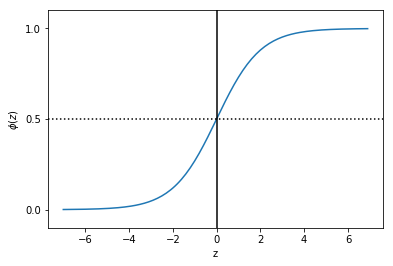

In [61]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [62]:
import pandas as  pd
cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
cancer.columns=['ID', 'Clump_Thickness', 'U_Cell_Size', 'U_Cell_Shape','Marg_Adhes', 'Epi_Cell_Size', 'Bare_Nuc', 'Chromatin', 'Nucleoli','Mitoses', 'Class']
cancer = cancer[~((cancer['Bare_Nuc'] == '?' ))].astype(float)
cols=['Clump_Thickness', 'U_Cell_Size', 'U_Cell_Shape','Marg_Adhes', 'Epi_Cell_Size', 'Bare_Nuc', 'Chromatin', 'Nucleoli','Mitoses']

In [63]:
cancer.head()

,ID,Clump_Thickness,U_Cell_Size,U_Cell_Shape,Marg_Adhes,Epi_Cell_Size,Bare_Nuc,Chromatin,Nucleoli,Mitoses,Class
0,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
1,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
2,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
3,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
4,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0


In [64]:
from sklearn.cross_validation import train_test_split
X = cancer.iloc[0:, [1,5]].values
X_train,X_test,y_train,y_test = train_test_split(X,cancer['Class'], test_size=0.3, random_state=0)

In [65]:
col2=['Clump_Thickness','Epi_Cell_Size']

In [70]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('green', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label='Benign' if cl == 2 else 'Malignant')



In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [76]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
print("Accuracy on the training set: %.3f" % lr.score(X_train,Y_train))
print("Accuracy on the testing set: %.3f" % lr.score(X_test,Y_test))

Accuracy on the training set: 0.361
Accuracy on the testing set: 0.327


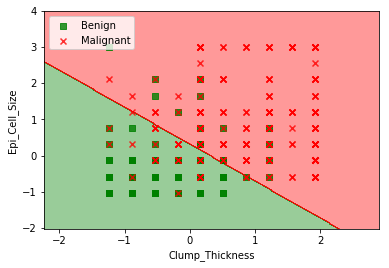

In [74]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std,y_combined, classifier=lr)
plt.xlabel('Clump_Thickness')
plt.ylabel('Epi_Cell_Size')
plt.legend(loc='upper left')
plt.show()